TensorFlow是一个用于训练深度学习模型的强大开源软件库，由Google Brain小组推出；

## 1. 计算图
基本原理是定义一个用来计算的图，然后TensorFlow就会使用这个图进行运算，最后输出结果。

TensorFlow使用的是Python语言，但底层使用C++开发，Python只是做了一层接口而已。
![](./tf001.png)

## 2.分解任务：

TensorFlow重要的功能是，分解任务，将一个复杂任务分解成多个相对简单任务，部署到多GPU, 多核，多计算机中执行，最后汇总计算结果。

![](./tf000.png)

## 3.TensorFlow实现分布式计算;
TensorFow可以部署到多个计算机；

## 4.TensorFlow特点：

1.跨平台(Windows, Linux, MacOS)

2.提供了TF.learn来兼容sk-learn,  TF.learn是从Scikit-flow(sk-flow)演化过来的。

3.提供了TF-Slim 库简化神经网络的构建，训练和评估；

4.在Tensorflow 之上，建立了很多独立的库，如Keras.

5.通过TensorFlow API, 可以非常灵活地创建任何你能想到的神经网络架构。

6.包含了很多高效的，使用C++实现的机器学习API。特别是用来构建神经网络的API。

7.提供了一个非常强大的称为TensorBoard的可视化工具，可以用来查看计算图，浏览学习曲线。


# TensorFlow基础

TensorFlow由两部分组成，Tensor(张量) 和 Flow(流，计算图)，TensorFlow意为张量在图中流动；

## 1.Tensor(张量)

In TensorFlow, data isn’t stored as integers, floats, or strings. These values are encapsulated in an object called a tensor. 

TensorFlow使用Tensor来表示所有的数据，Tensor可以理解为N维数组或列表。

![](./tf002.png)

## 2.Session
TensorFlow’s api is built around the idea of a computational graph, a way of visualizing a mathematical process. Let’s take the TensorFlow code you ran and turn that into a graph:

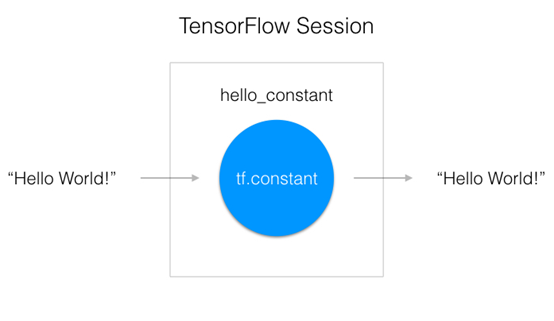

A "TensorFlow Session", as shown above, is an environment for running a graph. The session is in charge of allocating the operations to GPU(s) and/or CPU(s), including remote machines. 

The code creates a session instance, sess, using tf.Session. The sess.run() function then evaluates the tensor and returns the results.

**Tensor是一个张量，用于存放各种数据，多个Tensor按计算图组织数据关系，sess会话调用run（）执行计算，促使Tensor按计算图流动，得到计算结果，是为Tensor Flow。**

More in : 
https://medium.com/tebs-lab/deep-neural-networks-as-computational-graphs-867fcaa56c9?


## 3.常量

In [32]:
import tensorflow as tf
import os

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' #默认显示所有信息
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # 只显示警告和错误
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 只显示错误

hello = tf.constant('hello')
n = tf.constant(99)

print(hello)
print(n)
print(type(hello))

Tensor("Const_12:0", shape=(), dtype=string)
Tensor("Const_13:0", shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.Tensor'>


In [33]:
session = tf.Session()
print(session.run(hello))

b'hello'


In [34]:
print(str(session.run(hello),'utf-8'))

hello


In [35]:
print(session.run(n))

99


### 指定常量的数据类型

In [36]:
str_value = tf.constant('hello tensorflow!', dtype=tf.string)
print(str(session.run(str_value),'utf-8'))

hello tensorflow!


In [37]:

print(session.run(tf.constant(32,tf.int32)))

32


### 常量运算

In [38]:
x = tf.constant(20)
y = tf.constant(60)

session = tf.Session()
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)
div = tf.divide(x,y)

In [39]:
print(session.run(add))
print(session.run(sub))
print(session.run(mul))
print(session.run(div))

80
-40
1200
0.3333333333333333


In [40]:
# x*x + x*y + 10
result = x * x + x*y +10
value = tf.constant(20)
print(session.run(result))

1610


## 4.占位符

不指定值，可以重用tensor，必须指定类型；

Tf.placeholder: 传入普通变量，返回一个tensor，tensor用于tf.session.run()。

如果feed_dict与tensor类型不匹配且不能强制转换， you’ll get the error “ValueError: invalid literal for...”.

In [41]:
input1 = tf.placeholder(tf.int32)
input2 = tf.placeholder(tf.int32)

output = tf.add(input1, input2)
session = tf.Session()

# print(session.run(output)) 直接运行，出错
print(session.run(output, feed_dict={input1:2, input2:3}))
print(session.run(output, feed_dict={input1:10, input2:20}))
print(session.run(output, feed_dict={input1:[1,2,3], input2:[2,3,4]}))

5
30
[3 5 7]


## 5.变量

In [48]:
x = tf.Variable(2)
y = tf.Variable(3)

f = x*x + y +3

session = tf.Session()
session.run(x.initializer) # 必须调用run, 初始化变量
session.run(y.initializer)
session.run(y)


3

In [49]:
session.run(f)

10

In [50]:
x.load(10,session)
y.load(20,session)
session.run(y)

20

In [51]:
session.run(f)

123

In [52]:
session.close()

In [53]:
with tf.Session() as session:
    y.initializer.run()
    x.initializer.run()
    r = f.eval() #
print(r)

10


'''
并不会一下子初始化，而是在计算图中创建一个节点，这个节点会在绘画执行时初始化所有变量
惰性初始化
'''

一个TensorFlow程序分为两部分：
1.用于构建计算图的部分；
2.用于执行计算图部分；

In [54]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    ret = f.eval() #执行计算图
print(ret)

10


## 6.TensorFlow运算函数

https://www.tensorflow.org/api_docs/python/tf/math

In [55]:
import tensorflow as tf
import os

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' #默认显示所有信息
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # 只显示警告和错误
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 只显示错误

x = tf.Variable(10)
y = tf.Variable(20)
z = tf.Variable(-5)

value = tf.Variable(2.5,dtype=tf.float32)
init = tf.global_variables_initializer()

with tf.Session() as session:
    init.run()
    print(session.run(tf.add(x,y)))
    print(session.run(tf.subtract(x,y)))
    print(session.run(tf.multiply(x,y)))
    print(session.run(tf.divide(x,y)))
    print(session.run(tf.mod(x,y)))
    print(session.run(tf.abs(x)))
    print(session.run(tf.negative(x)))
    print(session.run(tf.square(x)))
    print(session.run(tf.sqrt(value))) #不能是整数
    print(session.run(tf.sign(z)))
    print(session.run(tf.sin(value))) #float


30
-10
200
0.5
10
10
-10
100
1.5811388
-1
0.5984721


### 类型转换

tf.subtract(tf.constant(2.0),tf.constant(1))  # Fails with ValueError: Tensor conversion requested dtype float32 for Tensor with dtype int32: 

保持表达式类型一致，或强制转换

tf.subtract(tf.cast(tf.constant(2.0), tf.int32), tf.constant(1))   # 1

## 7.管理计算图

In [56]:
import tensorflow as tf
import os

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' #默认显示所有信息
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # 只显示警告和错误
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 只显示错误

sess = tf.Session()
x1 = tf.Variable(5, name='x1')
sess.run(x1.initializer)

print(tf.get_default_graph().get_operation_by_name('x1'))
print(tf.get_default_graph().get_operation_by_name('x1').get_attr('dtype'))
print(x1.graph is tf.get_default_graph())

#创建一个新计算图
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(20)
    print(x2.graph is graph)

print(x2.graph is tf.get_default_graph())

name: "x1"
op: "VariableV2"
attr {
  key: "container"
  value {
    s: ""
  }
}
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "shape"
  value {
    shape {
    }
  }
}
attr {
  key: "shared_name"
  value {
    s: ""
  }
}

<dtype: 'int32'>
True
True
False


## 8.计算图节点的依赖与生命周期

In [57]:
import tensorflow as tf
import os

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' #默认显示所有信息
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # 只显示警告和错误
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 只显示错误

k = tf.constant(333)
x = k + 1
y = k + 2
z = x + 5

# 依赖重复计算两次
with tf.Session() as sess:
    print(y.eval())
    print(z.eval())
#依赖只计算一次
with tf.Session() as sess:
    y_val, z_val = sess.run([y,z])
    print(y_val, z_val)
#在计算图每次执行时，所有节点都会被丢弃，但变量不会，变量是由Session维护，除非关闭Session,否则变量一直存在

335
339
335 339


# 训练神经网络常用到的概念及API

# 1.初始化参数

### tf.truncated_normal()

从正态分布获得随机值，防止模型在同一个地方陷入stuck

In [69]:
n_features = 120
n_labels = 5
weights = tf.Variable(tf.truncated_normal((n_features, n_labels)))


init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(weights))


The tf.truncated_normal() function returns a tensor with random values from a normal distribution whose magnitude is no more than 2 standard deviations from the mean.

Since the weights are already helping prevent the model from getting stuck, you don't need to randomize the bias. Let's use the simplest solution, setting the bias to 0.

### tf.zeros()
weights已经获得随机值，bias可以设置为0


In [70]:
n_labels = 5
bias = tf.Variable(tf.zeros(n_labels))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(bias))

[0. 0. 0. 0. 0.]


# 2. 矩阵乘法tf.matmul()

Since xW in xW + b is matrix multiplication, you have to use the tf.matmul() function instead of tf.multiply(). 

Don't forget that order matters in matrix multiplication, **so tf.matmul(a,b) is not the same as tf.matmul(b,a).**

# 3.激活函数

常见的有logistic, relu, tanh

# 4.SOFTMAX



The next step is to assign a probability to each label, which you can then use to classify the data. Use the softmax function to turn your logits into probabilities.


![](./tf005.png)

In [68]:
x = tf.nn.softmax([2.0, 1.0, 0.2])
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(x))

[0.65223986 0.23994564 0.10781453]


# 4.One-Hot Encoding

![](./tf006.png)

# 5.交叉熵

Cross_Entropy用来衡量神经网络预测结果与标签差异程度；

当预测错误越大时，Cross_Entropy越大，一般训练网络的目标就是要最小化Cross_Entropy。

![](./tf007.png)

一个典型的回归网络模型，如下图：

![](./tf008.png)

In [58]:
'''
数据的归一化和标准化

梯度下降、k邻近
1 - 10   5            0.5

1 - 10000   5000      0.5



代价函数：最新平方误差函数

决策树、随机深林、XGBoost，都不会受特征值范围的影响

缩放数据的方法：归一化（normalization）和标准化（standardization）。

归一化：通过特征的最大最小值将特征缩放到[0,1]区间内。

标准化：通过特征的平均值和标准差将特征缩放成一个标准的正态分布，均值为0，方差为1。

sk-learn（scikit-learn）

'''

# 归一化
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('./basic/dataset/wine.csv')
print(data.head())

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


In [59]:
minMax = MinMaxScaler()

x_normalization = minMax.fit_transform(data)

print(x_normalization)

[[0.         0.84210526 0.1916996  ... 0.45528455 0.97069597 0.56134094]
 [0.         0.57105263 0.2055336  ... 0.46341463 0.78021978 0.55064194]
 [0.         0.56052632 0.3201581  ... 0.44715447 0.6959707  0.64693295]
 ...
 [1.         0.58947368 0.69960474 ... 0.08943089 0.10622711 0.39728959]
 [1.         0.56315789 0.36561265 ... 0.09756098 0.12820513 0.40085592]
 [1.         0.81578947 0.66403162 ... 0.10569106 0.12087912 0.20114123]]


In [60]:
# 标准化

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

x_std = std.fit_transform(data)
print(x_std)

[[-1.21394365  1.51861254 -0.5622498  ...  0.36217728  1.84791957
   1.01300893]
 [-1.21394365  0.24628963 -0.49941338 ...  0.40605066  1.1134493
   0.96524152]
 [-1.21394365  0.19687903  0.02123125 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 1.37386437  0.33275817  1.74474449 ... -1.61212515 -1.48544548
   0.28057537]
 [ 1.37386437  0.20923168  0.22769377 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.37386437  1.39508604  1.58316512 ... -1.52437837 -1.42894777
  -0.59516041]]
